In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [5]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [6]:
#draw column that not needed.
data_cleaned=data.drop(['Unnamed: 0','Temp C'],axis=1)
data_cleaned

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [8]:
#convert the datatype of month column.
data_cleaned['Month']=pd.to_numeric(data['Month'],errors='coerce')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [9]:
data_cleaned.describe()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp
count,120.000000,151.000000,158.000000,157.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,7.044586,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,1.433768,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,6.000000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,7.000000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,2010.0,97.000000


In [10]:
#checking duplicate rows.
data_cleaned[data_cleaned.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [11]:
data_cleaned[data_cleaned.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [12]:
#rename the column
data_cleaned.rename({'Solar.R':'Solar'},axis=1 ,inplace=True)
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [14]:
data_cleaned.isnull().sum() #display missing values count in each column.

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

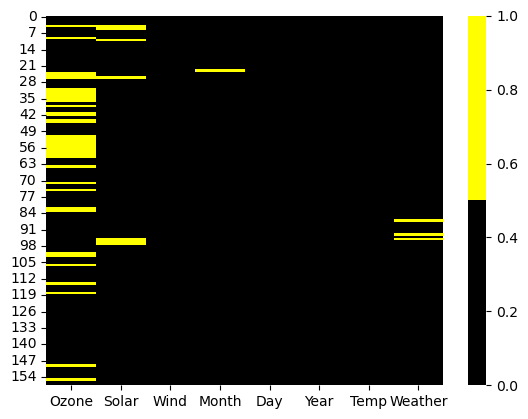

In [15]:
cols=data_cleaned.columns
colours=['black','yellow']
sns.heatmap(data_cleaned[cols].isnull(),cmap=sns.color_palette(colours),cbar=True)


In [16]:
#mean and median values
#(imputation of missing values)
median_ozone=data_cleaned["Ozone"].median()
mean_ozone=data_cleaned["Ozone"].mean()
print("mean_ozone: ",mean_ozone)
print("median_ozone: ",median_ozone)


mean_ozone:  41.583333333333336
median_ozone:  30.5


In [17]:
data_cleaned['Ozone']=data_cleaned['Ozone'].fillna(median_ozone) 
data_cleaned.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [18]:
data_cleaned['Solar']=data_cleaned['Solar'].fillna(median_ozone) 
data_cleaned.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [19]:
print(data_cleaned["Weather"].value_counts())
mode_weather=data_cleaned["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [21]:
data_cleaned["Weather"]=data_cleaned["Weather"].fillna(mode_weather)
data_cleaned.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [22]:
print(data_cleaned["Month"].value_counts())
mode_month=data_cleaned["Month"].mode()[0]
print(mode_month)

Month
9.0    34
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [23]:
data_cleaned["Month"]=data_cleaned["Month"].fillna(mode_month)
data_cleaned.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [24]:
mode_weather=data_cleaned["Weather"].mode()
print(mode_weather)

0    S
Name: Weather, dtype: object


In [25]:
data_cleaned.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S
157,18.0,131.0,8.0,9.0,29,2010,76,C


In [26]:
data_cleaned.reset_index(drop=True) 

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,30.5,30.5,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


<function matplotlib.pyplot.show(close=None, block=None)>

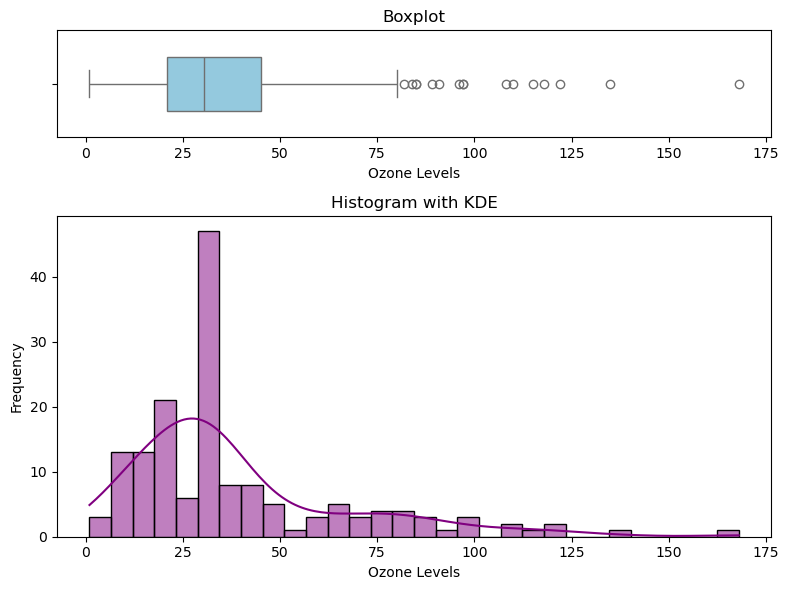

In [27]:
#detection of outliers
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data_cleaned["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes [0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data_cleaned["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show


Observations:
1)beyond 80 ozone levels we have Outliers
2)right-skewed histogram

<function matplotlib.pyplot.show(close=None, block=None)>

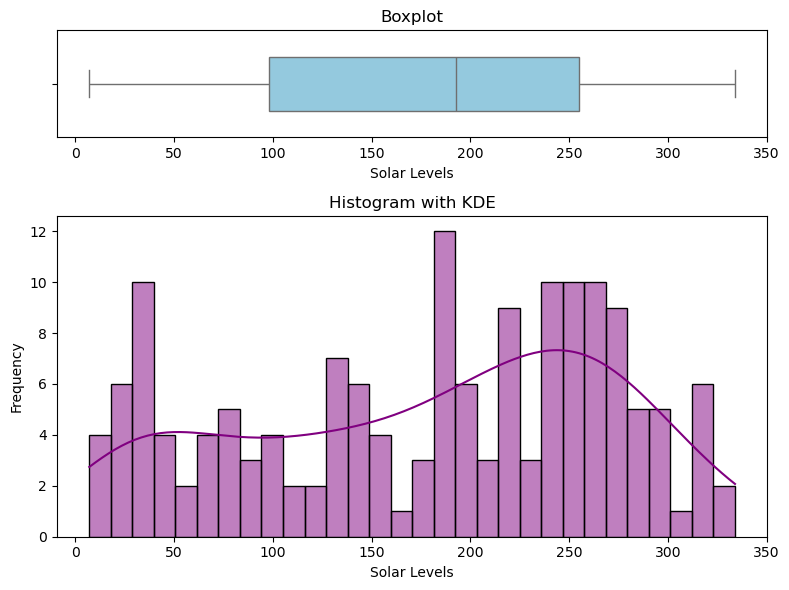

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data_cleaned["Solar"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes [0].set_xlabel("Solar Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data_cleaned["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show


Observations:
1)there are no outliers.
2)left-skewed histogram.

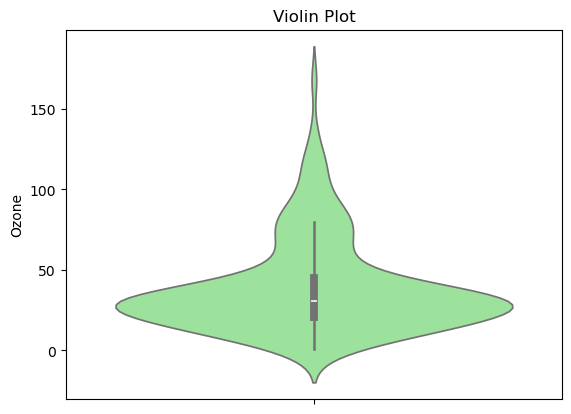

In [31]:
# Create a figure for violin plot

sns.violinplot(data=data_cleaned["Ozone"], color='lightgreen')
plt.title("Violin Plot")

#Show the plot
plt.show()

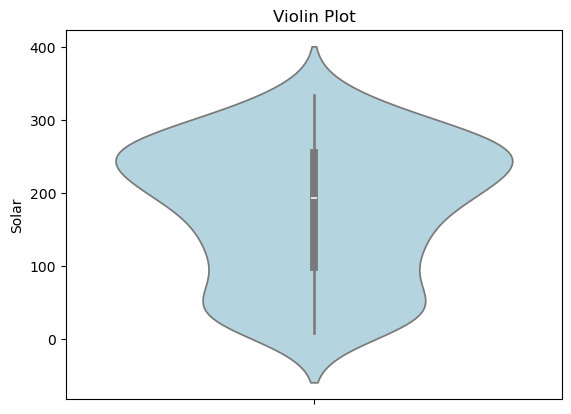

In [32]:
# Create a figure for violin plot

sns.violinplot(data=data_cleaned["Solar"], color='lightblue')
plt.title("Violin Plot")

#Show the plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fec1747cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fec0998980>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fec1747dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fec099b2c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fec0999610>],
 'means': []}

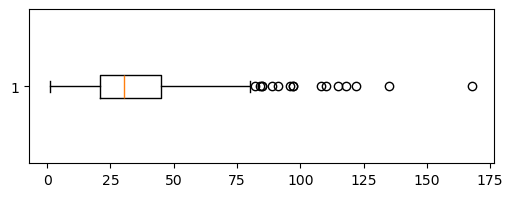

In [34]:
plt.figure(figsize=(6,2))
plt.boxplot(data_cleaned["Ozone"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fec0999220>,
 'caps': [<matplotlib.lines.Line2D at 0x1fec0798860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fec079a390>],
 'medians': [<matplotlib.lines.Line2D at 0x1fec079b5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fec0798e60>],
 'means': []}

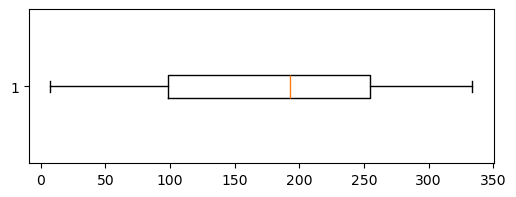

In [35]:
plt.figure(figsize=(6,2))
plt.boxplot(data_cleaned["Solar"],vert=False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

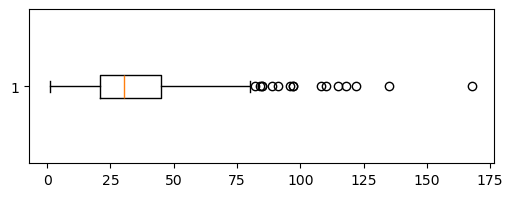

In [36]:
plt.figure(figsize=(6,2))
boxplot_data=plt.boxplot(data_cleaned["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

Method 2 for outlier detection


In [38]:
data_cleaned['Ozone'].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [39]:
mu=data_cleaned["Ozone"].describe()[1]
sigma =data_cleaned["Ozone"].describe()[2]
for x in data_cleaned["Ozone"]:
    if((x<(mu - 3*sigma)) or (x > (mu+ 3*sigma))):
        print(x)

135.0
168.0


C:\Users\user\AppData\Local\Temp\ipykernel_6788\3502073944.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu=data_cleaned["Ozone"].describe()[1]
C:\Users\user\AppData\Local\Temp\ipykernel_6788\3502073944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma =data_cleaned["Ozone"].describe()[2]


observation:
Its observed that only two outliers are identified
i the boxplot method more no. of outliers are identified
this is because the assumption of normality is not satisfied in this column

Text(0.5, 0, 'Theoretical Quantiles')

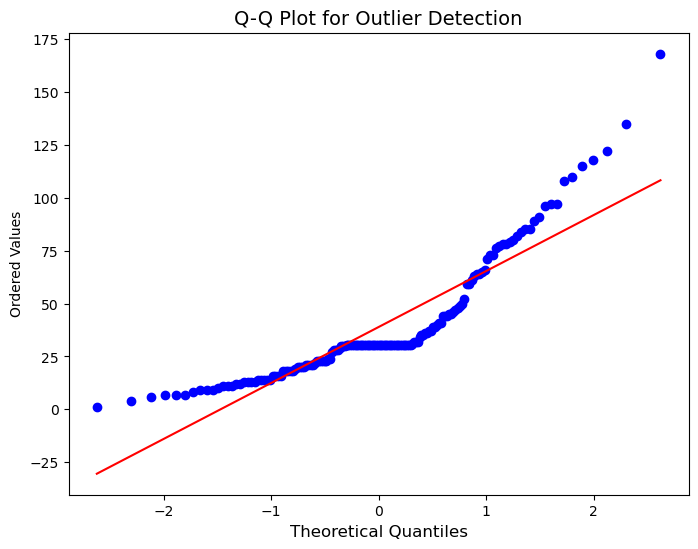

In [41]:
import scipy.stats as stats

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data_cleaned["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

Observation from Q-Q plot
The data doesnt follow normal distribution.
The data shows a right skewed distribution.

Text(0.5, 0, 'Theoretical Quantiles')

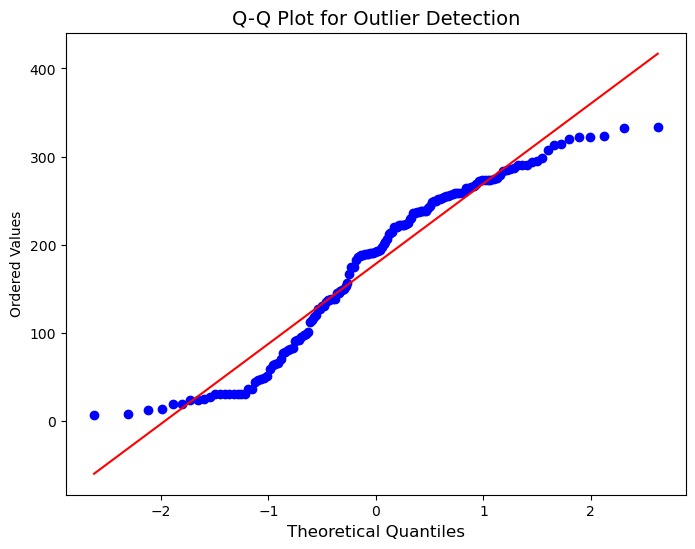

In [43]:
import scipy.stats as stats

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data_cleaned["Solar"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

C:\Users\user\AppData\Local\Temp\ipykernel_6788\530296315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_cleaned,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

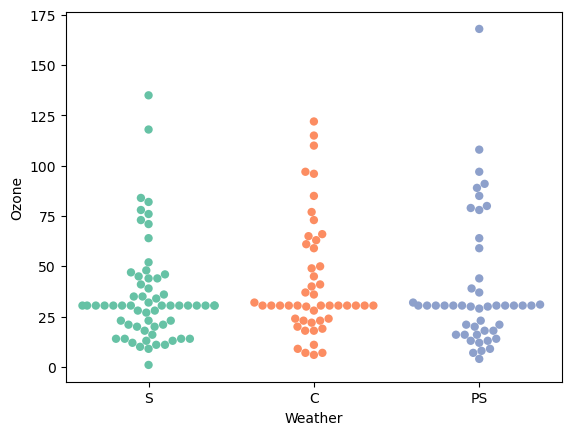

In [83]:
sns.swarmplot(data=data_cleaned,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)

C:\Users\user\AppData\Local\Temp\ipykernel_6788\2339978895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data_cleaned,x="Weather",y="Solar",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Solar'>

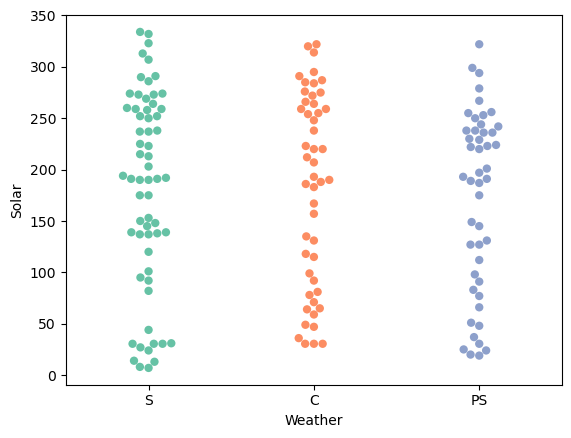

In [85]:
sns.swarmplot(data=data_cleaned,x="Weather",y="Solar",color="orange",palette="Set2",size=6)

C:\Users\user\AppData\Local\Temp\ipykernel_6788\749178314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data_cleaned,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

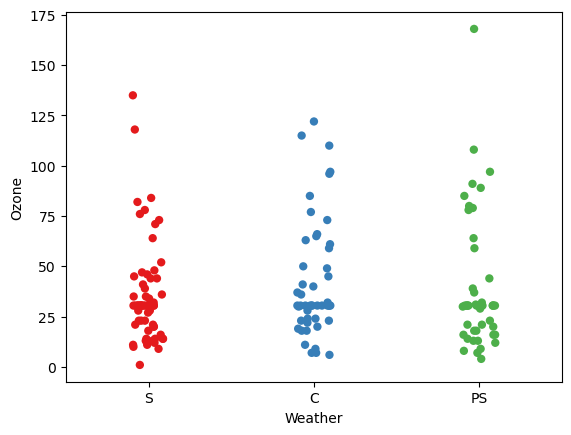

In [87]:
sns.stripplot(data=data_cleaned,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6788\1032578622.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data_cleaned,x="Weather",y="Solar",color="orange",palette="Set1",size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Solar'>

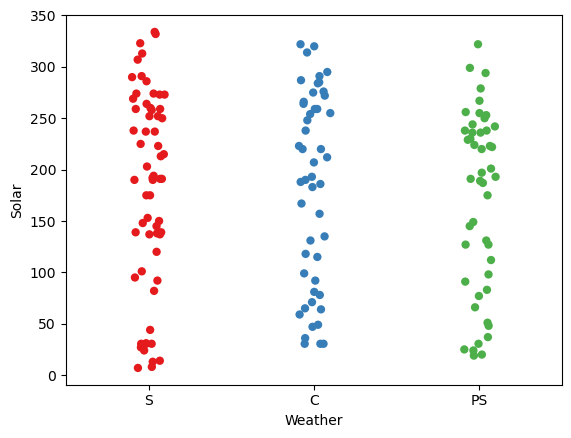

In [91]:
sns.stripplot(data=data_cleaned,x="Weather",y="Solar",color="orange",palette="Set1",size=6,jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

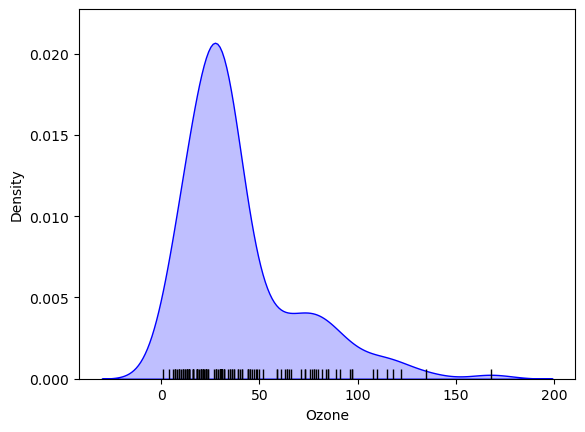

In [95]:
sns.kdeplot(data=data_cleaned["Ozone"],fill=True,color="blue")
sns.rugplot(data=data_cleaned["Ozone"],color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

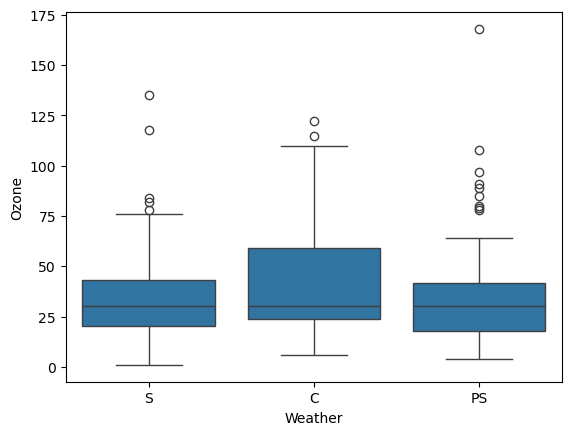

In [99]:
sns.boxplot(data=data_cleaned,x="Weather",y="Ozone")

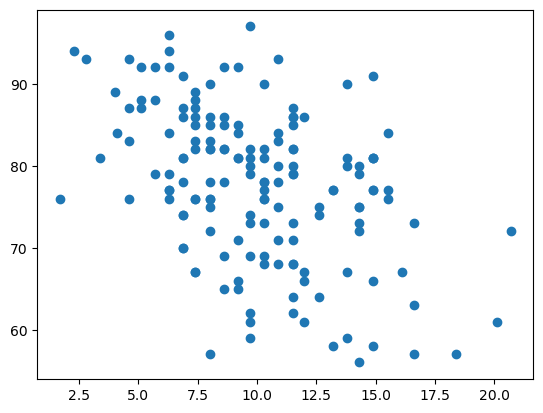

In [101]:
plt.scatter(data_cleaned["Wind"],data_cleaned["Temp"])

In [103]:
data_cleaned["Wind"].corr(data_cleaned["Temp"]) #correlation coeff.

-0.441246717631239